In this project our objective is to build a simple linear regression model based on sci-kit learn to predict medical costs from the data set that you can find [in this link](https://www.kaggle.com/mirichoi0218/insurance)

The first step will be to upload the data file to the Google virtual machine

## Load basic libraries and data

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

import io
pd.set_option('display.max_columns', None)
df = pd.read_csv(io.BytesIO(uploaded["insurance.csv"]))

df.head()

Saving insurance.csv to insurance.csv


age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

## Data exploration


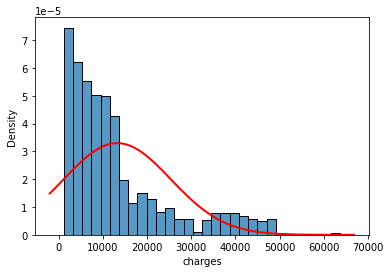

In [ ]:
# Observe how the target variable "charges" is distributed, which
# collects the charges made to the insurance
sns.histplot(df['charges'], stat="density")

# We fit the data to the normal distribution
from scipy.stats import norm
mu, std = norm.fit(df['charges'])

# Plot
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, color='red')
plt.show()

From the above figure we can conclude that the target variable "charges" does not follow a normal distribution, but rather a mixed distribution, which could be a problem to obtain optimal performance for our linear model.

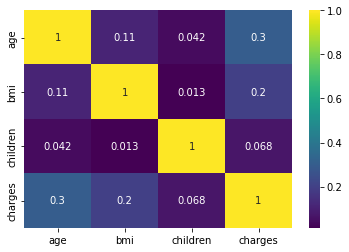

In [ ]:
# We review the correlation matrix
sns.heatmap(df.corr(),annot=True, cmap='viridis');

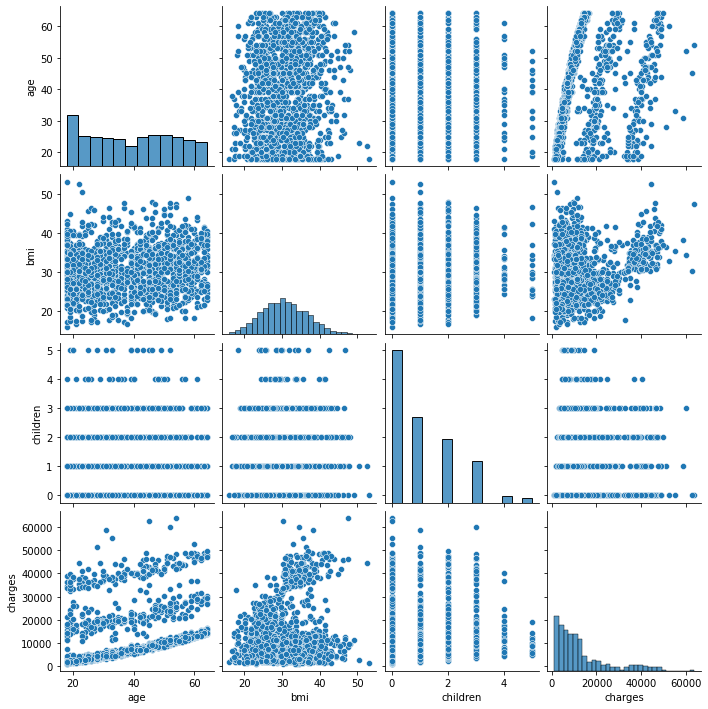

In [ ]:
# We created a pair plot to visualize the morphology of the correlations
sns.pairplot(df);

The next step is to code the categorical variables. 

In [ ]:
# To do this, we will use the get_dummies method of Pandas
vars = ['sex', 'smoker', 'region']
dummies = [pd.get_dummies(df[var]) for var in vars]
df_d = pd.concat(dummies, axis=1)
df_d.rename(columns={'no': 'non-smoker', 'yes': 'nicotian'}, inplace=True)
df = df.drop(['sex','smoker','region'], axis=1)
df_c = pd.concat([df, df_d], axis=1)

# We see that our new dataset is correctly configured
df_c.head()

age     bmi  children      charges  female  male  non-smoker  nicotian  \
0   19  27.900         0  16884.92400       1     0           0         1   
1   18  33.770         1   1725.55230       0     1           1         0   
2   28  33.000         3   4449.46200       0     1           1         0   
3   33  22.705         0  21984.47061       0     1           1         0   
4   32  28.880         0   3866.85520       0     1           1         0   

   northeast  northwest  southeast  southwest  
0          0          0          0          1  
1          0          0          1          0  
2          0          0          1          0  
3          0          1          0          0  
4          0          1          0          0


 Scaled dataset: 
            age       bmi  children   charges    female      male  non-smoker  \
0    -1.438764 -0.453320 -0.908614  0.298584  1.010519 -1.010519   -1.970587   
1    -1.509965  0.509621 -0.078767 -0.953689 -0.989591  0.989591    0.507463   
2    -0.797954  0.383307  1.580926 -0.728675 -0.989591  0.989591    0.507463   
3    -0.441948 -1.305531 -0.908614  0.719843 -0.989591  0.989591    0.507463   
4    -0.513149 -0.292556 -0.908614 -0.776802 -0.989591  0.989591    0.507463   
...        ...       ...       ...       ...       ...       ...         ...   
1333  0.768473  0.050297  1.580926 -0.220551 -0.989591  0.989591    0.507463   
1334 -1.509965  0.206139 -0.908614 -0.914002  1.010519 -1.010519    0.507463   
1335 -1.509965  1.014878 -0.908614 -0.961596  1.010519 -1.010519    0.507463   
1336 -1.296362 -0.797813 -0.908614 -0.930362  1.010519 -1.010519    0.507463   
1337  1.551686 -0.261388 -0.908614  1.311053  1.010519 -1.010519   -1.970587   

      nicotian  nor

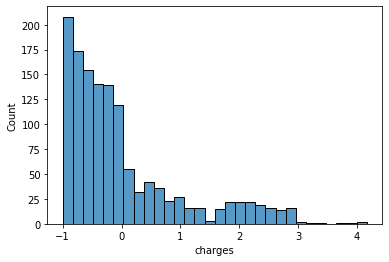

In [ ]:
# The next phase of the pre-processing is to re-scale the data
# In this case we will apply methods of the StandardScaler class of Sci-kit learn
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(df_c)
df_s = pd.DataFrame(scaler.fit_transform(df_c), columns=df_c.columns)
print("\n Scaled dataset: \n", df_s)
sns.histplot(df_s["charges"]);

## Feature Extraction

Text(0, 0.5, 'Percent Variance Explained')

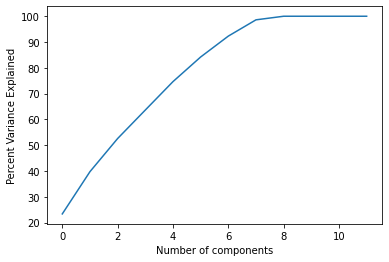

In [ ]:
from sklearn.decomposition import PCA

# Feature names are identified in column headers
features = df_s.columns
X = df_s[features]

# We analyze the complete set of variables
pca = PCA(n_components=len(features), random_state=2020)
pca.fit(X)
X_pca = pca.transform(X)

# Representamos en un gráfico el procentaje de varianza frente al número de componentes
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Percent Variance Explained")

In [ ]:
# We are left with the 6 variables that explain more than 90% of the variance
pca_s = PCA(n_components=6, random_state=2020)
pca_s.fit(X)

# We obtain the transformed set that incorporates the most explanatory variables
X_pca_s = pca_s.transform(X)
cols = ['PCA' + str(i) for i in range(6)]
df_pca = pd.DataFrame(X_pca_s, columns=cols)
print("Data for the 6 main components:\n", df_pca)

Data for the 6 main components:
           PCA0      PCA1      PCA2      PCA3      PCA4      PCA5
0     1.794247  1.834668 -0.797065  1.761831 -0.520355 -2.435473
1    -0.622380 -1.748394  1.626639 -0.870391  0.064339 -1.527498
2    -0.414757 -1.690923  1.615243 -0.585496  0.216697 -0.392165
3    -0.195383 -1.336715 -1.440494 -0.418641  1.708185 -0.347876
4    -0.904619 -1.576005 -0.928444 -0.467650  1.681639 -0.477592
...        ...       ...       ...       ...       ...       ...
1333 -0.410680 -1.469268 -0.644184  0.008130  1.909517  1.570023
1334 -1.505168  1.096178 -0.701978 -1.298499 -1.526170 -1.011097
1335 -1.213596  0.991307  2.075771 -0.955261 -0.022759 -1.765757
1336 -1.682817  1.076329 -0.381511  1.619760 -0.594675 -1.842200
1337  2.555342  2.187712 -1.094759 -0.066644  1.767942  0.687237

[1338 rows x 6 columns]


## Fitting of the linear model
Once the data preparation process is complete, we will fit the model.

In [ ]:
from sklearn.model_selection import train_test_split

# The characteristics that we are going to analyze are those selected with PCA
pca_features = df_pca.columns
X = df_pca[pca_features]
y = df_s['charges']

# We use sklearn's own function to split the data to training and testing  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (802, 6)
X_test: (536, 6)
y_train: (802,)
y_test: (536,)


In [ ]:
# We expose the training set to the linear regression model
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
# To obtain fit descriptors we use Sci-kit learn functions and
# calculate the predictions of the model on the test set

from sklearn import metrics
y_pred = lm.predict(X_test)

evar = metrics.explained_variance_score(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
mae = metrics.mean_absolute_error(y_test, y_pred) 
mse = metrics.mean_squared_error(y_test, y_pred) 

print('- Explained variance: ', round(evar, 2))    
print("- R2:", round(r2, 2))
print('- MAE: ', round(mae, 4))
print('- MSE: ', round(mse,4))
print('- RMSE: ', round(np.sqrt(mse), 4))

- Explained variance:  0.89
- R2: 0.89
- MAE:  0.2354
- MSE:  0.1154
- RMSE:  0.3396


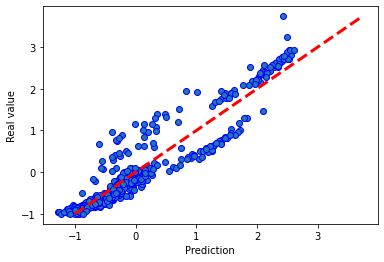

In [ ]:
# Finally we represent the regression line of the model
fig, ax = plt.subplots()
ax.scatter(y_pred, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Prediction')
ax.set_ylabel('Real value')
plt.show()